### Deliverable 1: Preprocessing the Data for a Neural Network

In [96]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [97]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [98]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [99]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

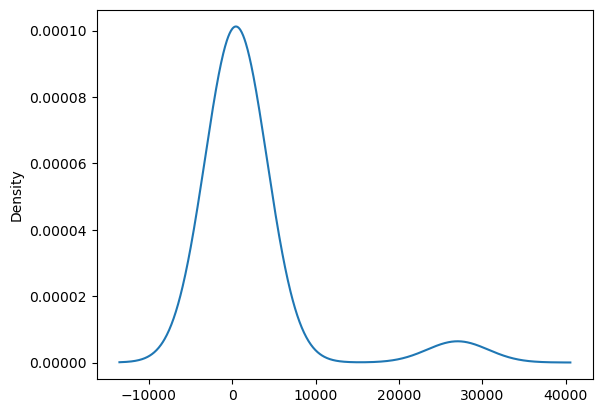

In [100]:
# Visualize the value counts of APPLICATION_TYPE
application_df.APPLICATION_TYPE.value_counts().plot.density()

In [101]:
value_counts = application_df['APPLICATION_TYPE'].value_counts().to_frame().to_dict()
index = application_df.APPLICATION_TYPE.value_counts().index


In [102]:
# Determine which values to replace if counts are less than ...?
replace_application = []
for i in index:
    if value_counts['APPLICATION_TYPE'][i] < 200:
        replace_application.append(i)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [103]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

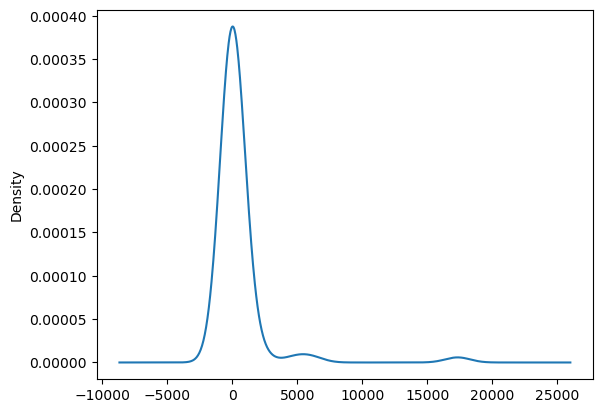

In [104]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [105]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [106]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [107]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [108]:
# Generate our categorical variable lists
#application_cat = application_df[['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
#       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']]
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [109]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/zevbennett/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [111]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.join(encode_df).drop(columns=application_cat, axis=1)

In [112]:
# Split our preprocessed data into our features and target arrays
y = application_df.pop('IS_SUCCESSFUL')
X = application_df

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [114]:
X_train

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
15071,1,130272,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27015,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30030,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9714,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33261,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32574,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8419,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34148,1,65711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [90]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

## Attempt 1 at optimization
Changed the activation function from relu to tanh

In [115]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

#Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 8)                 368       
                                                                 
 dense_40 (Dense)            (None, 5)                 45        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


## Attempt 2
Add more epochs

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

#Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

## Attempt 3 
add more nodes

In [122]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

#Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 16)                736       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [124]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:18 - loss: 46121.4453 - accuracy: 0.4375
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 621123.5000 - accuracy: 0.5063 
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 355683.7812 - accuracy: 0.4991
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 249726.8750 - accuracy: 0.4888
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoint


Epoch 1: saving model to checkpoints/weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 51725.6328 - accuracy: 0.4790
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 49902.6523 - accuracy: 0.4787
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 48454.6641 - accuracy: 0.4782
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 46699.9219 - accuracy: 0.4791

216/804 [=======>......................] - ETA: 1s - loss: 18836.6426 - accuracy: 0.4837
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 17529.6152 - accuracy: 0.4836
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 16922.9766 - accuracy: 0.4843
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 18128.4492 - accuracy: 0.4874
Epoch 2: saving model to checkpoints/weights.02.hdf5



Epoch 2: saving model to checkpoints/weights.02.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 68394.7812 - accuracy: 0.4852
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 68526.2188 - accuracy: 0.4853
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
796/804 [============================>.] - ETA: 0s - loss: 67731.9766 - accuracy: 0.4857
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 67115.4141 - accuracy: 0.4859
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 3623.3286 - accuracy: 0.5938
Epo

462/804 [================>.............] - ETA: 1s - loss: 71043.0703 - accuracy: 0.4903
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
482/804 [================>.............] - ETA: 0s - loss: 68429.2109 - accuracy: 0.4912
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
502/804 [=================>............] - ETA: 0s - loss: 66292.5703 - accuracy: 0.4929
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 63806.9727 - accuracy: 0.4921

163/804 [=====>........................] - ETA: 1s - loss: 16517.6680 - accuracy: 0.5199
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 14883.1758 - accuracy: 0.5259
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 14328.0811 - accuracy: 0.5268
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 20422.7656 - accuracy: 0.5252
Epoch 4: saving model to checkpoints/weights.04.hdf5


683/804 [========================>.....] - ETA: 0s - loss: 12166.4385 - accuracy: 0.5223
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 15414.5498 - accuracy: 0.5219
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 16163.7295 - accuracy: 0.5226
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 15995.4229 - accuracy: 0.5225
Epoch 4: saving model to checkpoints/weights.04.hdf5



Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 58919.7031 - accuracy: 0.4928
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 63279.0391 - accuracy: 0.4904
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 67701.3281 - accuracy: 0.4887
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoi

125/804 [===>..........................] - ETA: 2s - loss: 229.8937 - accuracy: 0.5225
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 241.0443 - accuracy: 0.5278
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 1319.6093 - accuracy: 0.5273
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 1449.6458 - accuracy: 0.5218
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch

645/804 [=======================>......] - ETA: 0s - loss: 5879.4126 - accuracy: 0.5159
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 5717.7881 - accuracy: 0.5160
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 5564.5068 - accuracy: 0.5153
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 5426.0435 - accuracy: 0.5154
Epo


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
369/804 [============>.................] - ETA: 1s - loss: 51496.6289 - accuracy: 0.4933
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
386/804 [=============>................] - ETA: 1s - loss: 50001.1211 - accuracy: 0.4937
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 47637.0508 - accuracy: 0.4955
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoi


Epoch 8: saving model to checkpoints/weights.08.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 71673.6953 - accuracy: 0.5482
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 63826.7969 - accuracy: 0.5545
Epoch 8: saving model to checkpoints/weights.08.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 60087.7070 - accuracy: 0.5558
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 67025.8750 - accuracy: 0.5423
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
122/804 [===>..........................] - ETA: 2s - l

572/804 [====================>.........] - ETA: 0s - loss: 19811.1016 - accuracy: 0.5258
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 19700.1992 - accuracy: 0.5233
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 19255.2578 - accuracy: 0.5219
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 19403.9961 - accuracy: 0.5201
Epoch 8: saving model to checkpoints/weights.08.hdf5


263/804 [========>.....................] - ETA: 1s - loss: 12293.6494 - accuracy: 0.5135
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 11481.3711 - accuracy: 0.5153
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 10946.1211 - accuracy: 0.5157
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 10507.1709 - accuracy: 0.5142
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5


763/804 [===========================>..] - ETA: 0s - loss: 31612.9648 - accuracy: 0.5097
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
783/804 [============================>.] - ETA: 0s - loss: 30842.3164 - accuracy: 0.5119
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 30047.5020 - accuracy: 0.5114
Epoch 10/100
  1/804 [..............................] - ETA: 1s - loss: 1289.1656 - accuracy: 0.5938
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpo


Epoch 10: saving model to checkpoints/weights.10.hdf5
479/804 [================>.............] - ETA: 0s - loss: 75952.9219 - accuracy: 0.5014
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
499/804 [=================>............] - ETA: 0s - loss: 73006.0312 - accuracy: 0.5009
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 70825.0625 - accuracy: 0.5029
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 69320.9297 - accu

170/804 [=====>........................] - ETA: 1s - loss: 59183.0703 - accuracy: 0.5204
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 56438.6523 - accuracy: 0.5167
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 54566.4688 - accuracy: 0.5129
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 52465.0781 - accuracy: 0.5094
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weig


Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 23305.7188 - accuracy: 0.5157
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 22736.8633 - accuracy: 0.5168
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 22186.3887 - accuracy: 0.5170
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving mod

414/804 [==============>...............] - ETA: 1s - loss: 2385.2358 - accuracy: 0.5328
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 2379.9934 - accuracy: 0.5319
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 2525.8909 - accuracy: 0.5298
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 4284.3877 - accuracy: 0.5289
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.

 93/804 [==>...........................] - ETA: 2s - loss: 104944.0547 - accuracy: 0.5195
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 91846.2344 - accuracy: 0.5217 
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 78712.1172 - accuracy: 0.5121
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 69321.1094 - accuracy: 0.5036
Epoch 13: saving model to checkpoints/we

597/804 [=====================>........] - ETA: 0s - loss: 37109.0859 - accuracy: 0.5124
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 36476.3203 - accuracy: 0.5111
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 35535.0703 - accuracy: 0.5105
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 36438.9922 - accuracy: 0.5098
Epoch 13: saving model to checkpoints/weig

303/804 [==========>...................] - ETA: 1s - loss: 40855.2344 - accuracy: 0.5390
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 40440.8164 - accuracy: 0.5353
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 40358.8320 - accuracy: 0.5313
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 39100.4844 - accuracy: 0.5302
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weig

Epoch 15/100
  1/804 [..............................] - ETA: 1s - loss: 4752.8203 - accuracy: 0.5938
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 19/804 [..............................] - ETA: 2s - loss: 3217.8098 - accuracy: 0.4852
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 44438.4023 - accuracy: 0.4960
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 29993.


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 24539.8828 - accuracy: 0.5118
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 23892.0137 - accuracy: 0.5099
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 24178.8301 - accuracy: 0.5080
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving mod


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 10461.4951 - accuracy: 0.5505
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 9795.9600 - accuracy: 0.5486 
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 9194.7451 - accuracy: 0.5472
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 9074.7568 - accuracy: 0.5480
Epoch 16: saving model to checkpoints/weight

735/804 [==========================>...] - ETA: 0s - loss: 18060.1777 - accuracy: 0.5173
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 17606.4355 - accuracy: 0.5173
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 17156.7715 - accuracy: 0.5170
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
795/804 [============================>.] - ETA: 0s - loss: 16726.3301 - accu


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 10879.9707 - accuracy: 0.5421
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
470/804 [================>.............] - ETA: 1s - loss: 10833.8877 - accuracy: 0.5413
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
486/804 [=================>............] - ETA: 0s - loss: 19297.5898 - accuracy: 0.5429
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
505/804 [=================>............] - ETA: 0s - loss: 18932.0625 - accu


Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 642.1069 - accuracy: 0.5577
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 1273.4684 - accuracy: 0.5598
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 2194.4534 - accuracy: 0.5568
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
207/804 [======>.........

657/804 [=======================>......] - ETA: 0s - loss: 11962.5098 - accuracy: 0.5196
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 11827.8369 - accuracy: 0.5186
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 11721.7021 - accuracy: 0.5182
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 11461.9150 - accuracy: 0.5170
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weig

363/804 [============>.................] - ETA: 1s - loss: 19179.3574 - accuracy: 0.5460
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
382/804 [=============>................] - ETA: 1s - loss: 18377.9883 - accuracy: 0.5420
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
398/804 [=============>................] - ETA: 1s - loss: 17774.9395 - accuracy: 0.5399
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 17341.5781 - accuracy: 0.5359
Epoch 19: saving model to checkpoints/weig


Epoch 20: saving model to checkpoints/weights.20.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 3244.5945 - accuracy: 0.5439
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 2798.1797 - accuracy: 0.5327
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 3346.9402 - accuracy: 0.5408
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 2951.0376 - accuracy


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 25747.7012 - accuracy: 0.5224
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 24940.4727 - accuracy: 0.5257
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 24170.2109 - accuracy: 0.5277
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving mod


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 25034.7383 - accuracy: 0.5129
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 23748.0605 - accuracy: 0.5120
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 22695.6836 - accuracy: 0.5111
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
365/804 [============

  1/804 [..............................] - ETA: 8s - loss: 108.0036 - accuracy: 0.6250
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 21/804 [..............................] - ETA: 2s - loss: 3135.7434 - accuracy: 0.5223
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 3269.1423 - accuracy: 0.5173
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 5604.6055 - accuracy: 0.5227
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.2

514/804 [==================>...........] - ETA: 0s - loss: 8297.9668 - accuracy: 0.5158
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8387.1836 - accuracy: 0.5132
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 8235.9424 - accuracy: 0.5125
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 9511.6387 - accuracy: 0.5111
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 22527.7734 - accuracy: 0.4861
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 22163.0801 - accuracy: 0.4877
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 20818.9551 - accuracy: 0.4894
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 19714.8594 - accu


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 11973.4531 - accuracy: 0.5194
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 11669.4814 - accuracy: 0.5192
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
791/804 [============================>.] - ETA: 0s - loss: 11485.6094 - accuracy: 0.5189
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
804/804 [============

443/804 [===============>..............] - ETA: 1s - loss: 2819.9006 - accuracy: 0.5261
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
463/804 [================>.............] - ETA: 1s - loss: 3002.5764 - accuracy: 0.5240
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
483/804 [=================>............] - ETA: 0s - loss: 3510.6116 - accuracy: 0.5214
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
503/804 [=================>............] - ETA: 0s - loss: 8656.0029 - accuracy


Epoch 25: saving model to checkpoints/weights.25.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 2148.6379 - accuracy: 0.4805
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 1980.2184 - accuracy: 0.4951
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 2785.1062 - accuracy: 0.5028
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
219/804 [=======>.......


Epoch 25: saving model to checkpoints/weights.25.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 5053.3354 - accuracy: 0.5046
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 5326.1230 - accuracy: 0.5037
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 6024.2808 - accuracy: 0.5024
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 5968.9224 - accuracy


Epoch 26: saving model to checkpoints/weights.26.hdf5
395/804 [=============>................] - ETA: 1s - loss: 1323.4429 - accuracy: 0.5316
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 1298.0679 - accuracy: 0.5319
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 2802.7744 - accuracy: 0.5313
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
455/804 [===============


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 15651.4395 - accuracy: 0.5155
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 22223.9180 - accuracy: 0.5135
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 20664.5391 - accuracy: 0.5101
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving mod


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 8260.8086 - accuracy: 0.5244
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8055.1411 - accuracy: 0.5257
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8945.5088 - accuracy: 0.5256
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model 


Epoch 28: saving model to checkpoints/weights.28.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 10033.9053 - accuracy: 0.4969
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
362/804 [============>.................] - ETA: 1s - loss: 9774.6260 - accuracy: 0.4945 
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
382/804 [=============>................] - ETA: 1s - loss: 11626.2539 - accuracy: 0.4921
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
399/804 [=============>................] - ETA: 1s - loss: 11345.8232 - accu

 48/804 [>.............................] - ETA: 3s - loss: 636.7261 - accuracy: 0.5215
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 486.6031 - accuracy: 0.5278
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 460.6847 - accuracy: 0.5278
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 415.7454 - accuracy: 0.5309
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.h

568/804 [====================>.........] - ETA: 0s - loss: 8155.0361 - accuracy: 0.5129
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 7978.2891 - accuracy: 0.5149
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 8099.7021 - accuracy: 0.5166
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 7873.8003 - accuracy


Epoch 30: saving model to checkpoints/weights.30.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 1530.9766 - accuracy: 0.5391
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 2100.1045 - accuracy: 0.5362
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 2050.7820 - accuracy: 0.5371
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
354/804 [============>..

Epoch 31/100
  1/804 [..............................] - ETA: 1s - loss: 645.3779 - accuracy: 0.5625
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 20/804 [..............................] - ETA: 2s - loss: 10724.1230 - accuracy: 0.5750
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 6601.0312 - accuracy: 0.5523 
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 4684.5


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 1919.7678 - accuracy: 0.5503
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 1852.3840 - accuracy: 0.5512
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 1793.2729 - accuracy: 0.5511
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model 


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 11453.1973 - accuracy: 0.5292
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 11614.1670 - accuracy: 0.5248
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 11285.3525 - accuracy: 0.5233
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving mod

766/804 [===========================>..] - ETA: 0s - loss: 7383.2368 - accuracy: 0.5481
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
786/804 [============================>.] - ETA: 0s - loss: 7200.5210 - accuracy: 0.5504
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 7069.5146 - accuracy: 0.5518
Epoch 33/100
  1/804 [..............................] - ETA: 1s - loss: 2.5401 - accuracy: 0.7812
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 17/804 [.......................


Epoch 33: saving model to checkpoints/weights.33.hdf5
487/804 [=================>............] - ETA: 0s - loss: 808.0170 - accuracy: 0.5750
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
507/804 [=================>............] - ETA: 0s - loss: 1786.3196 - accuracy: 0.5742
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 1886.1122 - accuracy: 0.5725
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 1899.0452 - accuracy:


Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 2983.1343 - accuracy: 0.5282
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 14241.3281 - accuracy: 0.5302
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 13286.8037 - accuracy: 0.5271
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving mode


Epoch 34: saving model to checkpoints/weights.34.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 8277.4756 - accuracy: 0.5127
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8083.9746 - accuracy: 0.5163
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 7876.8735 - accuracy: 0.5183
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
788/804 [===============


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
459/804 [================>.............] - ETA: 0s - loss: 7933.6294 - accuracy: 0.5075
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
479/804 [================>.............] - ETA: 0s - loss: 7840.9570 - accuracy: 0.5050
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
498/804 [=================>............] - ETA: 0s - loss: 7599.1406 - accuracy: 0.5031
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
512/804 [===============


Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 796.1746 - accuracy: 0.5777
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 731.0209 - accuracy: 0.5681
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 688.4365 - accuracy: 0.5634
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
230/804 [=======>..........


Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 2297.0007 - accuracy: 0.5315
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 2251.5796 - accuracy: 0.5298
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 2200.5464 - accuracy: 0.5280
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model 


Epoch 37: saving model to checkpoints/weights.37.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 1114.0217 - accuracy: 0.5530
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 1167.3474 - accuracy: 0.5486
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 1157.0583 - accuracy: 0.5477
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
467/804 [================>.............] - ETA: 1s - loss: 1124.7936 - accuracy: 0.5472
Epoch 37: saving model to checkpoints/weights.

111/804 [===>..........................] - ETA: 2s - loss: 298.2191 - accuracy: 0.5701
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 299.4873 - accuracy: 0.5672
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 324.0752 - accuracy: 0.5683
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 311.9985 - accuracy: 0.5747
Epoch 38: saving model to checkpoints/weights.38.h


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 424.3936 - accuracy: 0.5801
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 413.5586 - accuracy: 0.5810
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 407.3708 - accuracy: 0.5798
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to 


Epoch 39: saving model to checkpoints/weights.39.hdf5
357/804 [============>.................] - ETA: 1s - loss: 7725.6758 - accuracy: 0.5046
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
373/804 [============>.................] - ETA: 1s - loss: 8290.6396 - accuracy: 0.5017
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
391/804 [=============>................] - ETA: 1s - loss: 7956.1216 - accuracy: 0.4994
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 8233.6602 - accuracy

 59/804 [=>............................] - ETA: 2s - loss: 374.4278 - accuracy: 0.5927
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 607.0260 - accuracy: 0.5862
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 520.6557 - accuracy: 0.5707
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 436.4181 - accuracy: 0.


Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 1435.7395 - accuracy: 0.5541
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 1394.4080 - accuracy: 0.5564
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 1366.8695 - accuracy: 0.5574
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
654/804 [===============


Epoch 41: saving model to checkpoints/weights.41.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 812.6759 - accuracy: 0.5480
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 789.0328 - accuracy: 0.5519
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 743.7190 - accuracy: 0.5547
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
365/804 [============>.....

  1/804 [..............................] - ETA: 8s - loss: 90.4482 - accuracy: 0.5000
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 21/804 [..............................] - ETA: 2s - loss: 3908.5376 - accuracy: 0.4807
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 14211.3857 - accuracy: 0.4756
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 15059.2002 - accuracy

526/804 [==================>...........] - ETA: 0s - loss: 2012.9722 - accuracy: 0.5575
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 1945.5339 - accuracy: 0.5607
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 1899.3710 - accuracy: 0.5624
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 1839.2457 - accuracy


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 359.8447 - accuracy: 0.5774
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 447.0513 - accuracy: 0.5717
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 421.3789 - accuracy: 0.5746
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
307/804 [==========>.......


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
782/804 [============================>.] - ETA: 0s - loss: 1263.8180 - accuracy: 0.5719
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 1264.8619 - accuracy: 0.5695
Epoch 44/100
  1/804 [..............................] - ETA: 1s - loss: 164.5234 - accuracy: 0.5312
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 18/804 [..............................] - ETA: 2s - loss: 2468.9360 - accuracy: 0.4549
Epoch 44: saving model to che

473/804 [================>.............] - ETA: 1s - loss: 1609.2590 - accuracy: 0.4985
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
493/804 [=================>............] - ETA: 0s - loss: 1648.9696 - accuracy: 0.4997
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 1773.8192 - accuracy: 0.4991
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 1741.8217 - accuracy: 0.4979
Epoch 44: saving model to checkpoints/weights.


Epoch 45: saving model to checkpoints/weights.45.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 278.1116 - accuracy: 0.4992
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 263.2716 - accuracy: 0.4981
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 258.4625 - accuracy: 0.4964
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 336.3339 - accuracy: 0.4966
Epoch 45: saving model to checkpoints/weights.45.h

677/804 [========================>.....] - ETA: 0s - loss: 846.7529 - accuracy: 0.5436
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 829.8631 - accuracy: 0.5448
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 808.4707 - accuracy: 0.5454
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 789.3700 - accuracy: 0.5450
Epoch 45: saving model to checkpoints/weights.45.h


Epoch 46: saving model to checkpoints/weights.46.hdf5
385/804 [=============>................] - ETA: 1s - loss: 1453.8125 - accuracy: 0.5636
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 1384.6996 - accuracy: 0.5619
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 1325.0439 - accuracy: 0.5645
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
445/804 [===============


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 3127.4619 - accuracy: 0.4760
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 4839.1890 - accuracy: 0.4773
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 4392.2881 - accuracy: 0.4781
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model 


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 1843.5393 - accuracy: 0.4985
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 1864.7841 - accuracy: 0.4970
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 1819.9935 - accuracy: 0.4963
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model 

342/804 [===========>..................] - ETA: 1s - loss: 1806.6633 - accuracy: 0.5260
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
359/804 [============>.................] - ETA: 1s - loss: 1731.4537 - accuracy: 0.5268
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
376/804 [=============>................] - ETA: 1s - loss: 1653.2822 - accuracy: 0.5283
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
392/804 [=============>................] - ETA: 1s - loss: 1585.8719 - accuracy: 0.5283
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 1.2214 - accuracy: 0.5178
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 1.2147 - accuracy: 0.5184
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 1.1972 - accuracy: 0.5233
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
113/804 [===>....................

588/804 [====================>.........] - ETA: 0s - loss: 1.0473 - accuracy: 0.5276
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 1.0427 - accuracy: 0.5277
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 1.0372 - accuracy: 0.5284
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 1.0339 - accuracy: 0.5282
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epo


Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.8103 - accuracy: 0.5245
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.8063 - accuracy: 0.5264
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.8041 - accuracy: 0.5268
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkp

 20/804 [..............................] - ETA: 2s - loss: 0.7463 - accuracy: 0.5094
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.7340 - accuracy: 0.5219
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.7297 - accuracy: 0.5276
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.7206 - accuracy: 0.5359
Epo


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.7138 - accuracy: 0.5270
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.7128 - accuracy: 0.5282
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.7122 - accuracy: 0.5287
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
622/804 [======================>.


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6737 - accuracy: 0.5262
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6733 - accuracy: 0.5258
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.6732 - accuracy: 0.5267
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkp

804/804 [==============================] - 3s 3ms/step - loss: 0.6616 - accuracy: 0.5288
Epoch 53/100
  1/804 [..............................] - ETA: 1s - loss: 0.7685 - accuracy: 0.4375
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6664 - accuracy: 0.5331
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6560 - accuracy: 0.5448
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/we


Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6425 - accuracy: 0.6425
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6416 - accuracy: 0.6429
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6409 - accuracy: 0.6439
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkp


Epoch 54: saving model to checkpoints/weights.54.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.6397 - accuracy: 0.6408
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6395 - accuracy: 0.6398
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.6402 - accuracy: 0.6410
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6412 - accuracy: 0.6403
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epo


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6379 - accuracy: 0.6460
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6378 - accuracy: 0.6460
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6377 - accuracy: 0.6458
Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.7186 - accuracy: 0.5000
Epoch 55: saving model to checkpoints/we


Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6386 - accuracy: 0.6443
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6383 - accuracy: 0.6440
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6387 - accuracy: 0.6446
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkp

185/804 [=====>........................] - ETA: 1s - loss: 0.6373 - accuracy: 0.6377
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.6383 - accuracy: 0.6375
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6383 - accuracy: 0.6388
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6375 - accuracy: 0.6417
Epo

715/804 [=========================>....] - ETA: 0s - loss: 0.6356 - accuracy: 0.6467
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6357 - accuracy: 0.6466
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6357 - accuracy: 0.6462
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6354 - accuracy: 0.6470
Epo

426/804 [==============>...............] - ETA: 1s - loss: 0.6358 - accuracy: 0.6466
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6359 - accuracy: 0.6460
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6359 - accuracy: 0.6471
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6363 - accuracy: 0.6472
Epo


Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.6352 - accuracy: 0.6511
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6365 - accuracy: 0.6481
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6361 - accuracy: 0.6484
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkp


Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6336 - accuracy: 0.6528
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6340 - accuracy: 0.6525
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6341 - accuracy: 0.6519
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6345 - accuracy: 0.6517
Epo


Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.7212 - accuracy: 0.5929
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.7201 - accuracy: 0.5910
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.7171 - accuracy: 0.5936
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
448/804 [===============>........


Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5077
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 0.6931 - accuracy: 0.5124
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 0.6931 - accuracy: 0.5130
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkp

636/804 [======================>.......] - ETA: 0s - loss: 0.6921 - accuracy: 0.5252
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6921 - accuracy: 0.5254
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5258
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6921 - accuracy: 0.5253
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epo

350/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epo


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5212
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5232
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5230
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkp

612/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5271
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5262
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5265
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5263
Epo

330/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5262
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5260
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5246
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5250
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epo

 38/804 [>.............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5210
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5163
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epo


Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5273
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5266
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6919 - accuracy: 0.5261
Epo


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkp


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5250
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5430
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkp


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5278
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5275
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epo


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5229
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5235
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5248
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkp


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 67: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.5288
Epoch 68/100
  1/804 [..............................] - ETA: 1s - loss: 0.7087 - accuracy: 0.3750
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5129
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 37/804 [>.............................] 

497/804 [=================>............] - ETA: 0s - loss: 0.6923 - accuracy: 0.5218
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6922 - accuracy: 0.5228
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6922 - accuracy: 0.5229
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5232
Epo

213/804 [======>.......................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5220
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5224
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5221
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5226
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epo


Epoch 69: saving model to checkpoints/weights.69.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epo

433/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5286
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epo

135/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5387
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epo

660/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epo


Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkp

 97/804 [==>...........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5428
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5470
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5454
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5401
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epo


Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkp

331/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5274
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
392/


Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5175
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5230
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 83/804 [==>...........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epo

544/804 [===================>..........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5233
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5233
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5235
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5240
Epo

265/804 [========>.....................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5184
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5198
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5206
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5206
Epo

804/804 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.5288
Epoch 77/100

Epoch 77: saving model to checkpoints/weights.77.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6957 - accuracy: 0.5000
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6963 - accuracy: 0.4955
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/we


Epoch 77: saving model to checkpoints/weights.77.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epo

234/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 78: saving model to checkpoints/weights.78.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 78: saving model to checkpoints/weights.78.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5295
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
286/804 [=========>...........


Epoch 78: saving model to checkpoints/weights.78.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6915 - accuracy: 0.5288


Epoch 79: saving model to checkpoints/weights.79.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5279
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
528/804 [==================>.....


Epoch 80: saving model to checkpoints/weights.80.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5264
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5237
Epo


Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkp

422/804 [==============>...............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5247
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5248
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5253
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5253
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epo


Epoch 82: saving model to checkpoints/weights.82.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 82: saving model to checkpoints/weights.82.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epo

297/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5247
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5260
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5255
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
357/

804/804 [==============================] - 3s 3ms/step - loss: 0.6916 - accuracy: 0.5288
Epoch 84/100
  1/804 [..............................] - ETA: 1s - loss: 0.6874 - accuracy: 0.5625
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5424
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5474
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5400
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: s

497/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5295
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epo

191/804 [======>.......................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5245
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5265
Epoch 85: saving model to checkpoints/weights.85.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5262
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5237
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5232
Epoch 85: saving model to che


Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epo


Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5257
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkp

101/804 [==>...........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
164/

621/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5274
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epo


Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
397/804 [=============>..........

 38/804 [>.............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6927 - accuracy: 0.5181
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5188
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5214
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epo


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5275
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epo


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5209
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5227
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5254
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5249
Epo


Epoch 90: saving model to checkpoints/weights.90.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6915 - accuracy: 0.5288
Epoch 91/100
  1/804 [..............................] - ETA: 1s - loss: 0.7061 - accuracy: 0.4062
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5230
Epoch 91: s


Epoch 91: saving model to checkpoints/weights.91.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5288
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
545/804 [===================>....

201/804 [======>.......................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5387
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epo


Epoch 92: saving model to checkpoints/weights.92.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epo


Epoch 93: saving model to checkpoints/weights.93.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5228
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5240
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5252
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6919 - accuracy: 0.5253
Epo


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkp


Epoch 94: saving model to checkpoints/weights.94.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
733/804 [========================


Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkp


Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5446
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5458
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5393
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkp

631/804 [======================>.......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5265
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5272
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5270
Epo


Epoch 97: saving model to checkpoints/weights.97.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
401/804 [=============>..........

 57/804 [=>............................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5417
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5369
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epo

592/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5278
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5266
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5271
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5278
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epo


Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5279
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epo

 19/804 [..............................] - ETA: 2s - loss: 0.6879 - accuracy: 0.5576
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5395
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6892 - accuracy: 0.5469
Epoch 100: saving model to checkpoin

534/804 [==================>...........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5267
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5263
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5260
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5264
Epoch 100: saving model to checkpoin

In [125]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.8763 - accuracy: 0.6248 - 558ms/epoch - 2ms/step
Loss: 1.8762542009353638, Accuracy: 0.6248396635055542
